In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [5]:
CovidDeath = pd.read_csv("AUDEATHS.csv")

In [6]:
CovidDeath

,Date,State,Age,Age bracket,Gender,Place,Transmission type,Transmission source,Co-morbidities,National toll number,State-reported toll - NSW,Fed reported state toll - NSW,State-reported toll - VIC,State-reported toll - QLD
0,01/03/20,WA,78.0,70s,Male,Perth,Overseas (cruise ship),Cruise ship (Diamond Princess),NaN,1,NaN,NaN,NaN,NaN
1,04/03/20,NSW,95.0,90s,Female,"Macquarie Park, Sydney",Local - Known Contact,Dorothy Henderson Lodge aged care facility,NaN,2,1,1,NaN,NaN
2,08/03/20,NSW,82.0,80s,Male,NaN,NaN,NaN,NaN,3,2,2,NaN,NaN
3,13/03/20,QLD,77.0,70s,Female,Sunshine Coast woman,Local - Known Contact,Local - Known Contact,Yes,4,NaN,NaN,NaN,1 (QLD - Died in Sydney)
4,15/03/20,NSW,77.0,70s,Female,Sydney,Overseas,NaN,NaN,6,3,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,08/10/21,NSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1403,08/10/21,NSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1404,08/10/21,NSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1405,08/10/21,NSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
print(CovidDeath.shape)

(1407, 14)


In [7]:
column = ['Date', 'State', 'Age_bracket', 'Gender', 'Place', 'State-reported_toll-NSW']
CovidDeath.head()

,Date,State,Age,Age bracket,Gender,Place,Transmission type,Transmission source,Co-morbidities,National toll number,State-reported toll - NSW,Fed reported state toll - NSW,State-reported toll - VIC,State-reported toll - QLD
0,01/03/20,WA,78.0,70s,Male,Perth,Overseas (cruise ship),Cruise ship (Diamond Princess),NaN,1,NaN,NaN,NaN,NaN
1,04/03/20,NSW,95.0,90s,Female,"Macquarie Park, Sydney",Local - Known Contact,Dorothy Henderson Lodge aged care facility,NaN,2,1,1,NaN,NaN
2,08/03/20,NSW,82.0,80s,Male,NaN,NaN,NaN,NaN,3,2,2,NaN,NaN
3,13/03/20,QLD,77.0,70s,Female,Sunshine Coast woman,Local - Known Contact,Local - Known Contact,Yes,4,NaN,NaN,NaN,1 (QLD - Died in Sydney)
4,15/03/20,NSW,77.0,70s,Female,Sydney,Overseas,NaN,NaN,6,3,3,NaN,NaN


In [8]:
CovidDeath.count()

Date                             1407
State                            1407
Age                                78
Age bracket                      1383
Gender                           1383
Place                             161
Transmission type                  76
Transmission source               736
Co-morbidities                     24
National toll number             1314
State-reported toll - NSW         409
Fed reported state toll - NSW     408
State-reported toll - VIC         867
State-reported toll - QLD           7
dtype: int64

In [10]:
males = CovidDeath[CovidDeath.Gender == "Male"]
females = CovidDeath[CovidDeath.Gender == "Female"]
males_high = CovidDeath[(CovidDeath.Gender == "Male") & (CovidDeath.Age == '>50')]
females_high = CovidDeath[(CovidDeath.Gender == "Female") & (CovidDeath.Age == '>50')]
print("males df shape:", males.shape)
print("females df shape:", females.shape)
print("males_high df shape:", males_high.shape)
print("females_high df shape:", females_high.shape)


males df shape: (666, 14)
females df shape: (623, 14)
males_high df shape: (0, 14)
females_high df shape: (0, 14)


In [11]:
print("males df =>", "mean:", males.Age.mean(),"median:", males.Age.median(),"std:", males.Age.std())
print("females df =>", "mean:", females.Age.mean(),"median:", females.Age.median(),"std:", females.Age.std())
print("males_high df =>", "mean:", males_high.Age.mean(), "median:", males_high.Age.median(), "std:", males_high.Age.std())
print("females_high df =>", "mean:", females_high.Age.mean(), "median:", females_high.Age.median(), "std:", females_high.Age.std())

males df => mean: 77.4 median: 79.5 std: 13.86713510056911
females df => mean: 81.73684210526316 median: 84.5 std: 12.091283906803941
males_high df => mean: nan median: nan std: nan
females_high df => mean: nan median: nan std: nan


<AxesSubplot:>

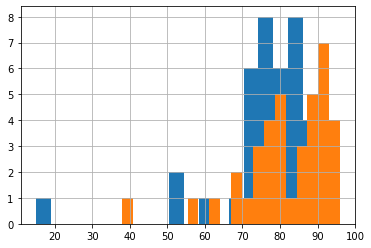

In [13]:
males['Age'].hist(density = None, histtype = "stepfilled",bins = 20)
females['Age'].hist(density = None, histtype = "stepfilled",bins = 20)

### Outliers

In [23]:
print( len( CovidDeath[(CovidDeath.Age == '>50')] ))
print( len( CovidDeath[(CovidDeath.Age > 70)] ))
print( len( CovidDeath[(CovidDeath.Age < 45)] ))
print( len( CovidDeath[(CovidDeath.Age == '>50')  & ((CovidDeath.Age > 70) | (CovidDeath.Age < 45))]))

0
67
2
0


In [25]:
cmales = CovidDeath[CovidDeath.Gender == "Male"]
cfemales = CovidDeath[CovidDeath.Gender == "Female"]
cmales_high = cmales[cmales.Age == ">50"]
cfemales_high = cfemales[cfemales.Age == ">50"]
print("cmales df:", cmales.shape)
print("cfemales df:", cfemales.shape)
print("cmales_high df:", cmales_high.shape)
print("cfemales_high df:", cfemales_high.shape)

cmales df: (666, 14)
cfemales df: (623, 14)
cmales_high df: (0, 14)
cfemales_high df: (0, 14)


In [26]:
print("males df =>", "mean:", males.Age.mean(), "median:", males.Age.median(),"std:", males.Age.std())
print("females df =>", "mean:", females.Age.mean(), "median:", females.Age.median(),"std:", females.Age.std())
print("males_high df =>", "mean:", males_high.Age.mean(), "median:", males_high.Age.median(), "std:", males_high.Age.std())
print("females_high df =>", "mean:", females_high.Age.mean(), "median:", females_high.Age.median(), "std:", females_high.Age.std())

males df => mean: 77.4 median: 79.5 std: 13.86713510056911
females df => mean: 81.73684210526316 median: 84.5 std: 12.091283906803941
males_high df => mean: nan median: nan std: nan
females_high df => mean: nan median: nan std: nan


D:\anaconda\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0, 0.5, 'Difference')

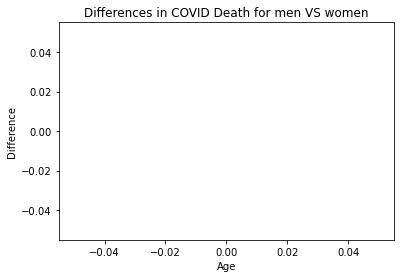

In [28]:
countx, divisionx = np.histogram(cmales_high.Age, density = True)
county, divisiony = np.histogram(cfemales_high.Age, density = True)
val = [( divisionx[i] + divisionx[i+1]) /2 for i in range(len(divisionx)-1)]
plt.plot(val, countx - county, 'o-')
plt.title("Differences in COVID Death for men VS women")
plt.xlabel("Age")
plt.ylabel("Difference")